**Содержание темы**

1. Теория

2. [Практика](https://colab.research.google.com/drive/1HEHdfduypm3KDWv2a-GGjfTL-7d6oPVN?usp=sharing)





## Введение

В этом уроке мы изучим новый тип нейронных сетей — **автокодировщики**.

До сих пор мы имели дело с нейронками, на вход которых подавали изображения, звуки, фрагменты текста, наборы параметров объектов, например квартир или автомобилей. И обучали НС распознавать, к какому классу относится текст или сколько стоит объект недвижимости. 

Мы работали с классификаторами и регрессорами. Для обучения таких сетей необходимо было подготовить датасеты, где каждому входному объекту присваивается номер класса или некоторое числовое значение – его оценка. 

Автокодировщики – это нечто иное. На их вход подают изображение, набор параметров и на выходе также получают изображение или набор параметров соответственно. Автокодировщики умеют воспроизводить или модифицировать полученный объект. 

Это полезно для множества задач: 



- Удаление шума с изображения (шумоподавление):

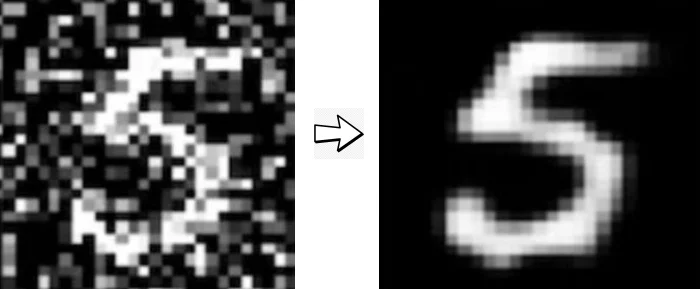

- Добавление недостающих частей изображения (Image Inpainting):

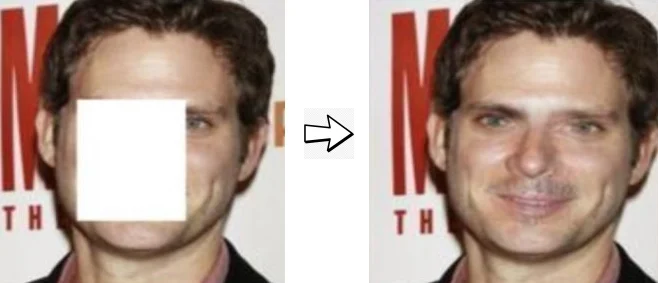

- Изменение размерности и кластеризация.

- Генерация данных. Класс автоэнкодера, известный как вариационный автоэнкодер, может даже научиться генерировать данные! Однако обычный автоэнкодер будет неточно работать из-за ряда недостатков.

- Автоэнкодеры используют для извлечения признаков под последующие задачи, например классификацию и обнаружение.

- Автоэнкодеры также применяют в семантической сегментации. Например, SegNet, который разработали для мультиклассовой пиксельной сегментации набора данных сцены городской дороги.

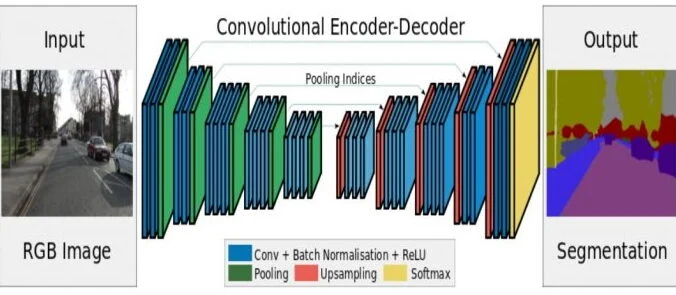

- Обнаружение выбросов.

Обучаем наш автокодировщик воспроизводить кошек:

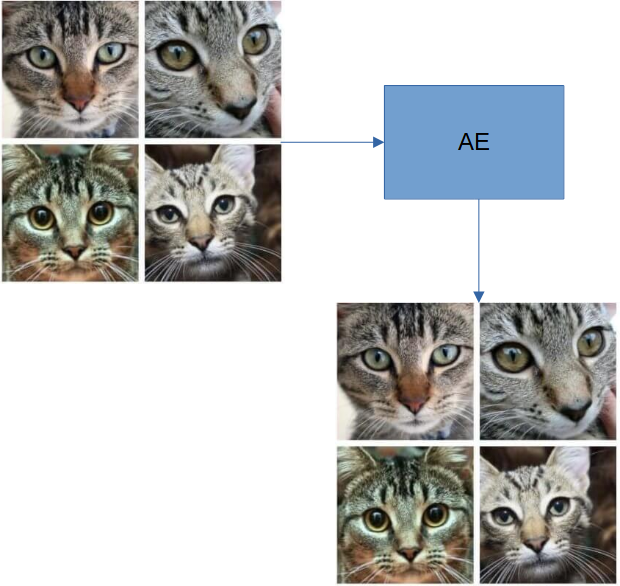

Автокодировщик вполне качественно и с минимальной ошибкой повторяет изображения.

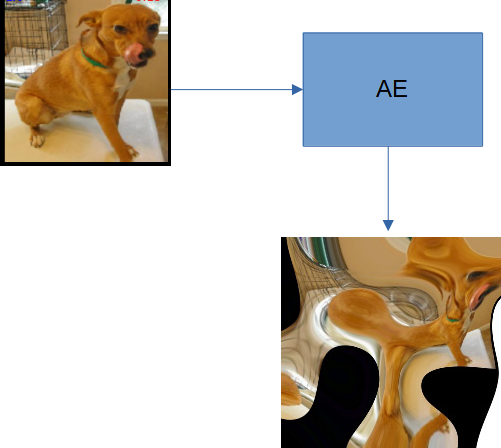

А вот фото собаки нейронка воспроизвела с большими ошибками. Значит, данная собака является выбросом и не входит в класс кошек.

-  Для работы с наборами данных. 

Например, чтобы отличать законные банковские операции от мошеннических.

## Обработка и генерация изображений

Чаще всего автокодировщики применяют именно для этих задач.

Давайте рассмотрим на примере датасета MNIST.

Изображения цифр состоят из 786 точек (28х28).
Однако, среди всех точек этого пространства лишь малая часть отвечает за каркас цифры, остальное — это неопределенные образы, шум.
Можно деформировать цифру (допустим, 5), написать ее другим почерком, другой рукой. Но пять все равно останется пятью. 

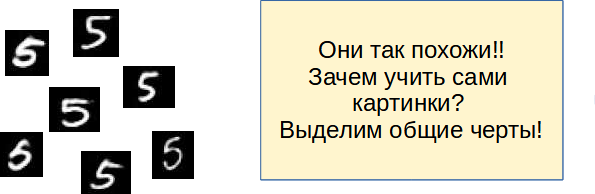

Мы хотим, чтоб нейронка понимала именно цифры, а не шум.

Можно заставить нейронную сеть выучить все многообразие цифр, написанных в разных стилях. Все будет хорошо, пока на вход не придет неизвестная ей кривая цифра, которую она не сможет узнать.

Однако все пятерки, какими бы кривыми они ни были, похожи между собой. Так что вместо заучивания изображений научим нейросеть выделять общие свойства (**фичи**, features), запоминать их и восстанавливать цифру на основании этой информации.

Тогда каждый новый вариант написания цифры 5 нейронка распознает и восстановит, пусть и с некоторой погрешностью.


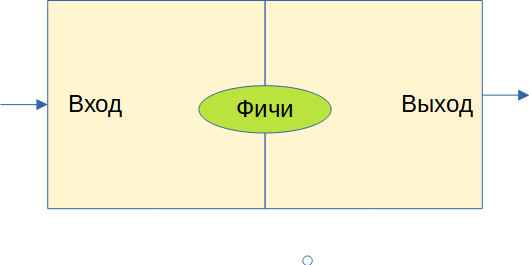

Изображение цифры описывается через 786 точек, а вот количество самих фич будет в разы меньше — в 10-100 и более раз. 
Начертание той же пятерки несущественно отличается от начертания тройки. Поэтому не нужно 786 фич.

С решением задачи воспроизведения разобрались. Но как генерировать цифры?
Как подсунуть нейронке нужные фичи и получить нужную цифру?

Формально говоря, у нейронки есть вход и выход, а фичи надо подавать куда-то в ее недра. Придется разрезать ее на две половины. Первая получает на вход картинку  28х28 и выделяет фичи, например 25 штук. Вторая из этих 25 фич делает картинку цифры. Хотим генерировать цифру — отдаем именно второй части 25 особенностей, выученных заранее. 




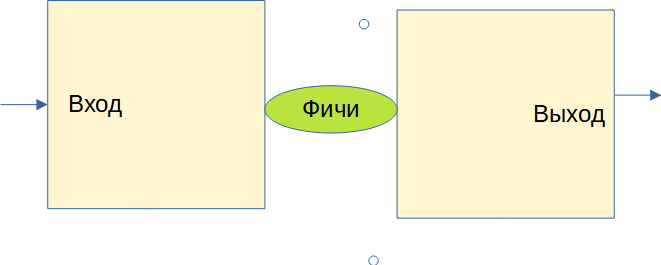

##  Вариационный автоэнкодер (VAE)

В самом начале мы говорили о двух половинах нашей нейронки. В автокодировщике первую половину называют энкодером, вторую — декодером. Фичи — это точки скрытого (Z) пространства. 

Скрытое пространство — это исторически сложившийся термин. При разделении АЕ на части мы получаем доступ к этому пространству. 

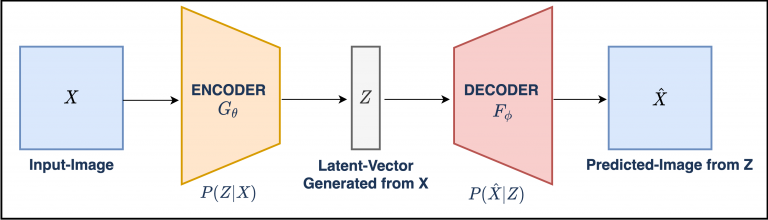

АЕ в начале кодирует объект `X` в некоторое скрытое состояние `Z`, размерность которого обычно меньше входа. Эту функцию выполняет энкодер. А затем разворачивает обратно, формируя на выходе объект `X'`. Эту функцию выполняет декодер. Размерности входного и выходного объектов могут как совпадать, так и нет.


Разберемся с работой автокодировщика на примере нашей задачи:


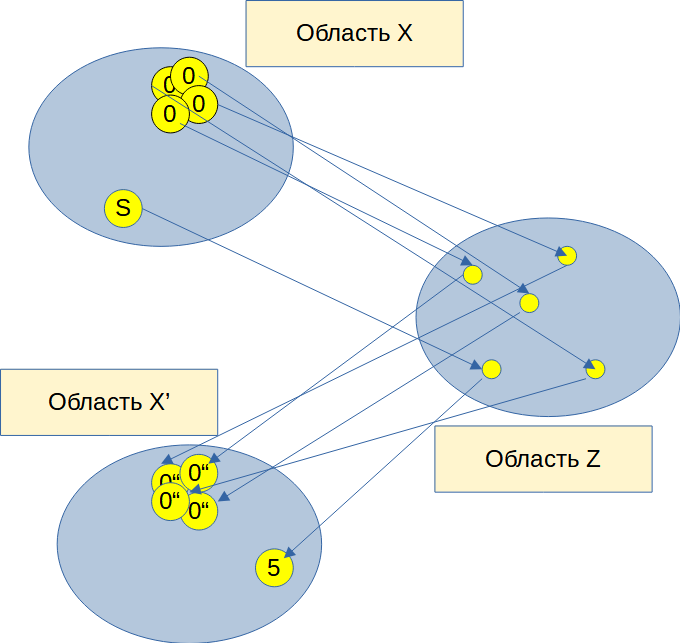

Автокодировщик принимает на вход датасет из изображений цифр – это множество точек пространства `Х`. Энкодер выделяет общие черты цифр — отображает элементы пространства `Х` в элементы скрытого пространства `Z`. Декодер же, наоборот, из найденных фич (элементов скрытого пространства) восстанавливает изображения цифр – элементов пространства `Х'`.

Множество точек `Х` однозначно связано со множеством точек `Z`. А множество точек `Z` имеет однозначное отображение в область `X'`. Что же будет, если на вход AE подать, пусть и известную, но несколько искаженную цифру? 

Получится новая точка в пространстве `Z` и некоторая неопределенность в результатах работы декодера. Пространство `Z` – не непрерывно, в нем практически невозможно строго указать области отображения определенных групп цифр. 


Взглянем на типичное скрытое пространство для AE, обученного десяти классам изображений цифр (каждый класс отмечен своим цветом):

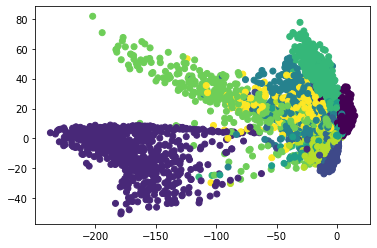

Этот график рассеяния несимметричен относительно точки `[0, 0]` и имеет значительный разброс. По оси `Х` есть значения в диапазоне `[-200, 50]`, по `Y`  – в диапазоне `[-40, 80]`. Мы также можем видеть некоторые выбросы, которые находятся далеко от других точек данных и лежат на крайних точках каждого измерения.

Наша цель — сгенерировать цифру, а это значит, что мы должны как-то выбрать случайную точку в скрытом пространстве. Затем передать ее в обученный декодер и ожидать, что он создаст изображение, похожее на цифру. Но где гарантия, что выбранная нами точка пространства `Z` вообще окажется в используемой области?

Скрытое пространство очень неравномерно используется. Между областями, занимаемыми разными классами, есть значительные пустоты. Сами области не непрерывны. Наблюдается серьезное рассеяние областей. При выборе точки в скрытом пространстве велика вероятность попасть в неиспользуемую зону и получить  произвольный символ (или шум), непохожий ни на один из классов.

Аналогично при восстановлении нового изображения цифры можно попасть в точку пространства `Z`, далекую от использованных областей и получить также произвольный символ. 

Выберем 100 точек в скрытом пространстве около начала координат и сформируем изображения цифр:

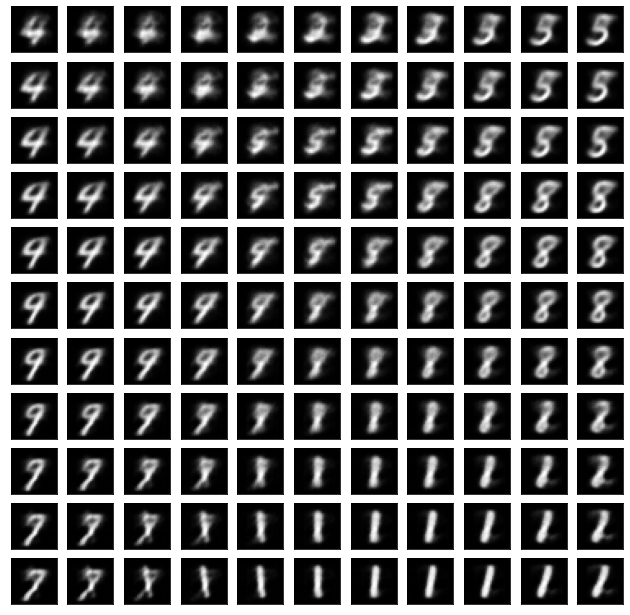

Результат просто огорчает. Очень много цифр невозможно отнести к какому либо классу. 

Отметим ряд неприятных особенностей АЕ:
1. Нельзя заранее узнать результат при генерации цифр или иных объектов из шума. С большой вероятностью можно попасть в свободную часть `Z` и получить шум или кривые линии на выходе декодера.
2. При восстановлении изображения, подавлении шума, создании утраченных фрагментов изображения и в других сходных задачах также легко попасть в свободную зону и получить изображение низкого качества.

Из-за этих особенностей применение AE ограничено.

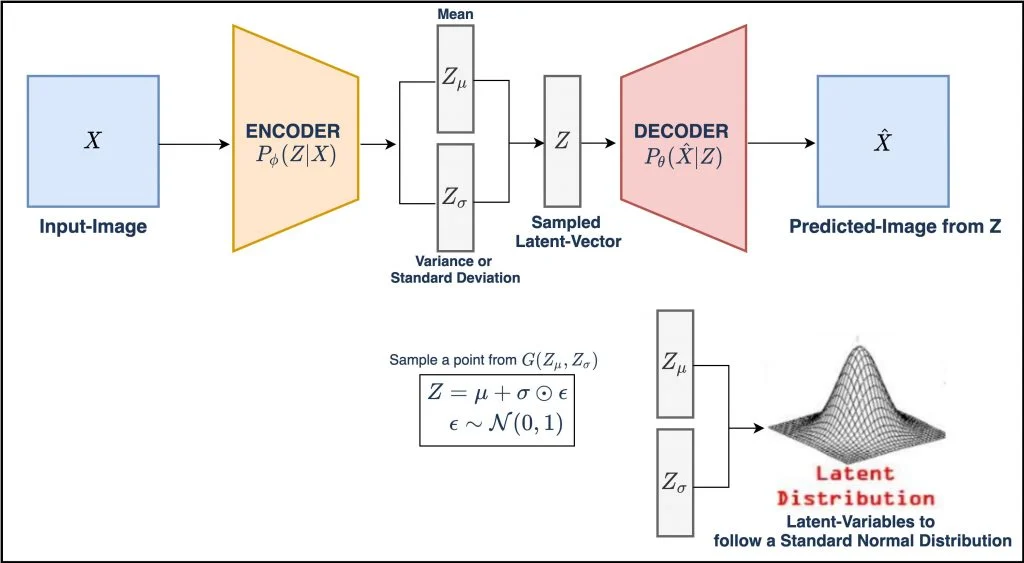

### Обучение VAE

Чему необходимо обучить VAE:

1. Преобразовывать точки из пространства `X` в области в пространстве `Z`.
2. Компоновать эти области вместе в одну большую непрерывную область.





Первую задачу можно решить следующим образом. Ранее обычный АЕ для каждого 
изображения создавал точку в пространстве `Z`. 


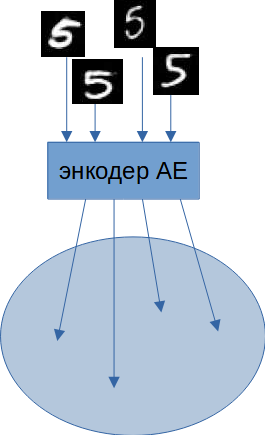

Сейчас он должен научится отображать изображение в некоторую область. Энкодер будет определять не саму точку, а центр и размер целой области. Обычно выбирают нормальное распределение точек  области. Такое распределение удобно тем, что описывается только двумя параметрами — математическим ожиданием и дисперсией. Именно эти параметры формируют энкодер. Далее происходит генерация точки в пространстве `Z` с заданными параметрами.
Размазывание точки до целой области дает VAE существенный выигрыш при восстановлении похожих изображений. 

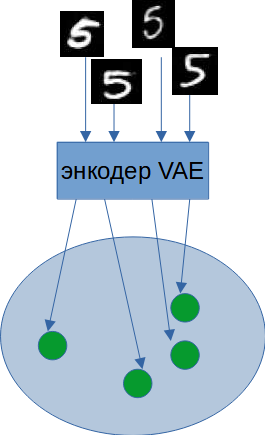

Из описания выше не ясно, как формируются области. Каждое изображение на входе АЕ, проходя через энкодер, порождает одну точку в скрытом пространстве. Но АЕ обучается не на одной эпохе. По мере прохождения обучения проходит множество эпох, и одно и то же изображение сгенерирует множество точек с одинаковыми мат. ожиданием и дисперсией.

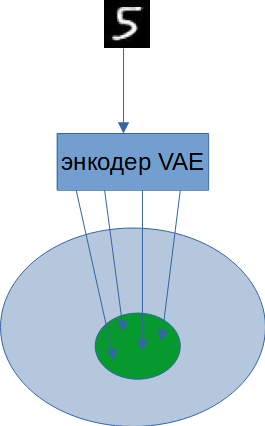

### Формирование областей в скрытом пространстве

Решение следующее:

>К выходу энкодера параллельно подключим два dense-слоя: один предскажет мат. ожидание, второй – дисперсию (или ее логарифм).

На рисунке ниже представлен фрагмент нейронки, реализующей эту идею. Вариант слева получает от декодера мат. ожидание и дисперсию, генерирует случайный вектор и отдает декодеру. Вариант очевидный, но эту сеть не обучить методом обратного распространения ошибки. Генератор случайных чисел – стохастический компонент сети. Тогда как метод обратного распространения градиента требует, чтобы части сети были детерминированы. Только так удастся итеративно передавать градиенты и применять правило цепочки. 

В работе мы будем придерживаться другого (справа) варианта. Энкодер выдает мат. ожидание и дисперсию. Генератор случайных чисел формирует нормальный вектор с нулевым мат. ожиданием и единичной дисперсией. Отдельный слой изменяет параметры распределения на значения, предсказанные энкодером и отдает декодеру. В этом случае на пути обратного распространения градиентов окажутся только детерминированные части сети.

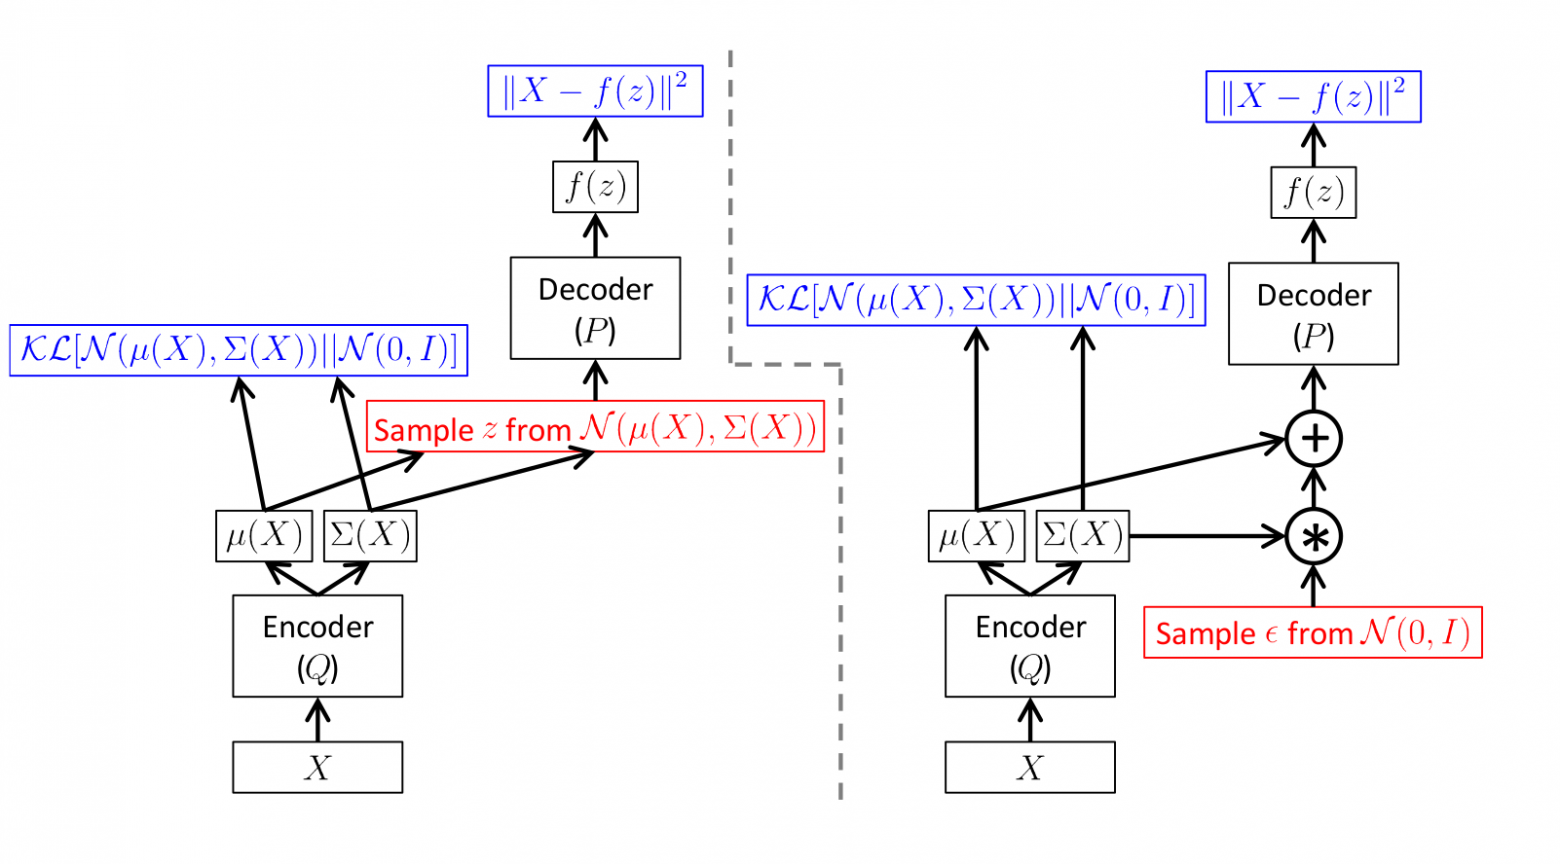

Даже превращение точек пространства `Z` в области не убирает промежутков между ними. Энкодер не ограничивает значения мат. ожидания и дисперсии. Необходимо дополнительно группировать используемые области в пространстве `Z`. И в идеале делать это в одну большую непрерывную область. Решением данной проблемы может стать их группировка вокруг некоторого центра.

Потребуем от VAE скомпоновать вместе все используемые области. В этом нам поможет дополнительная функция потерь, а именно — дивергенция Кульбака-Лейблера. Так у автокодировщика появится дополнительный лосс.


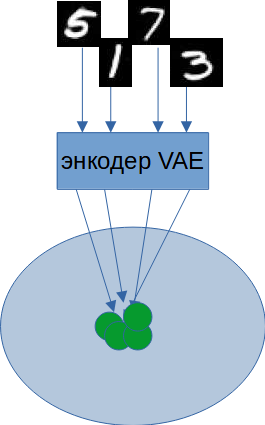

### Дивергенция Кульбака-Лейблера

>Дивергенция Кульбака-Лейблера (дивергенция KL) – это мера того, как одно распределение вероятностей отличается от второго, эталонного распределения вероятностей.



Чтобы скомпоновать точки в скрытом пространстве вокруг некоторого центра часто требуют, чтобы их распределение было нормальным. Здесь мы можем использовать дивергенцию Кульбака-Лейблера. Она покажет, насколько это распределение точек отличается от нормального.

В этом частном случае дивергенция KL имеет вид:

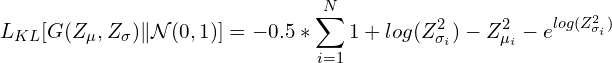

Или:

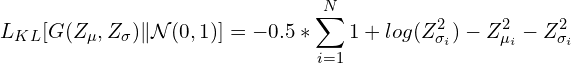

В приведенном выше уравнении `Zmu` и `Zsigma` – векторы мат. ожидания и дисперсии скрытого пространства кодировщика. Сумма берется по всем измерениям в скрытом пространстве.

KL-дивергенцию в Numpy можно записать как:

        kl_loss =  -0.5 * numpy.sum(1 + numpy.log(Z_sigma ** 2) - numpy.square(Z_mean) - numpy.exp(np.log(Z_sigma ** 2), axis = 1)
        # или так
        kl_loss =  -0.5 * numpy.sum(1 + numpy.log(Z_sigma ** 2) - numpy.square(Z_mean) - Z_sigma ** 2, axis = 1)

### Функция потерь VAE

Для обучения сети используем сразу два критерия:
1. Критерий для соответствия входного сигнала выходному (как в AE). Обычно использует MSE — средний квадрат ошибки или **BCE**, которое расшифровывается как binary cross entropy.  Важно: мера считается по входу и выходу автокодировщика, как все остальные лоссы в Keras.
2. Меру Кульбака-Лейблера, чтобы определять соответствие текущего распределения – заданному. Заметим, что мера считается не по входу и выходу автокодировщика, а по параметрам точек скрытого пространства


Функция потерь VAE – просто сумма двух потерь. Для улучшения обучения для каждого лосса можно использовать весовые коэффициенты:

изображение_2021-09-09_131451.png

Взглянем на скрытое пространство VAE.
Пример скрытого пространства VAE, обученного на десяти цифрах:

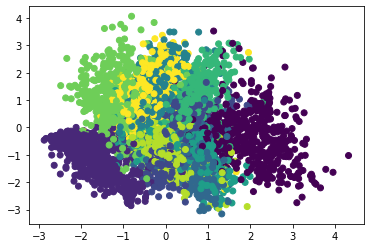

Пример генерации цифр при помощи VAE:

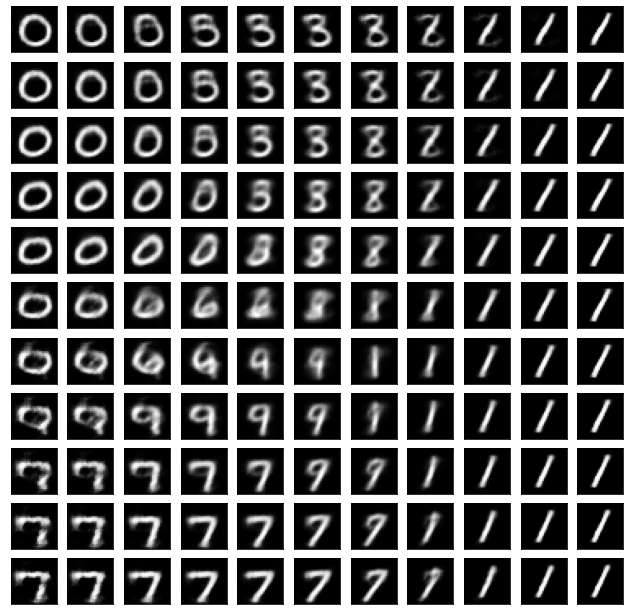

Выводы:
1. Используемая область стала компактнее.
2. Между точками стало меньше разрывов. 
3. Классы объектов различимы даже визуально.
4. Многие цифры легко идентифицировать.

Мы достигли своей цели!

Но что делать, если нужно сгенерировать определенную цифру, а не угадывать результат. Или получить цифру в определенном стиле. В этих случаях необходимо указать VAE-класс генерируемого объекта. Перейдем к вариационному автокодировщику с условием или conditional VAE.


## Вариационный автоэнкодер с условием (CVAE, Conditional VAE)

Генерируя цифры VAE можно заметить, что некоторые из них не полностью прорисованы, а некоторые и вовсе отсутствуют. Первая причина — это дефекты скрытого пространства, будь то неравномерное использование или пробелы между областями. Можно попытаться применять меры по его дальнейшему сжатию, но есть и другой путь. 

Наша обучающая выборка изображений цифр снабжена метками класса, то есть указанием того, какая цифра нарисована. Мы можем использовать эту дополнительную информацию и передавать ее кодеру и декодеру:

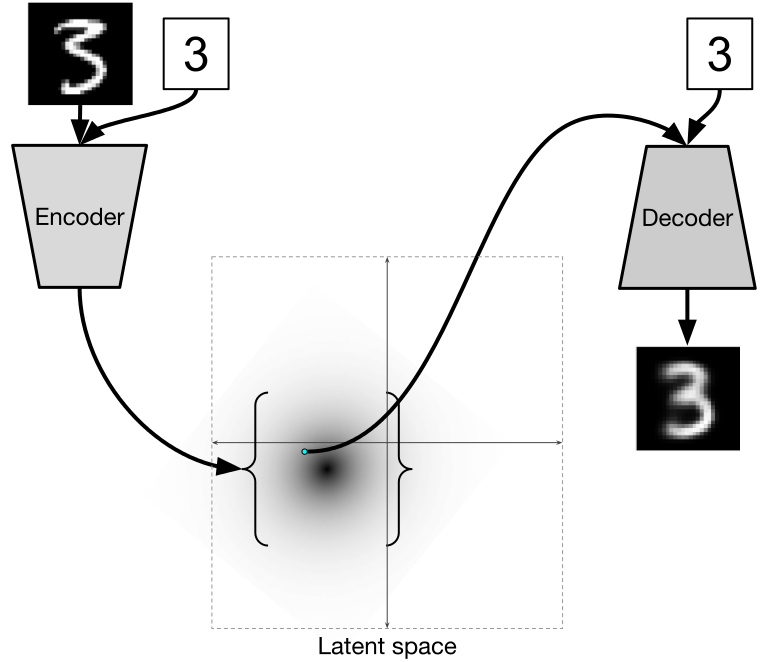

На вход энкодера мы подаем изображение и метку его класса. Энкодер честно отображает эту информацию в скрытое состояние. Таким образом в скрытом состоянии закодировано и изображение, и его класс. Остается подсказать декодеру, какую цифру он должен воспроизвести на выходе. Для этого мы также подадим ему метку класса:

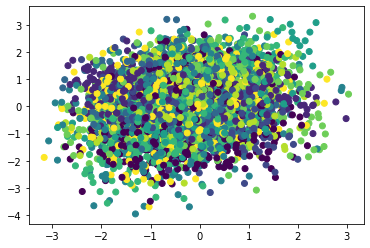


Взглянем на скрытое пространство CVAE. К нашему ужасу все классы перемешаны.
Нам нужна определенная цифра, допустим 5,  как быть? 

Сообщаем декодеру метку цифры 5. Декодер интерпретирует каждую точку скрытого пространства как различные изображения пятерок. Если мы укажем метку другой цифры, то увидим множество ее изображений. То есть, одна и та же точка (вектор) скрытого пространства интерпретируется декодером в соответствии с меткой класса. 

Благодаря этому мы получаем удобный инструмент для генерации изображений строго определенного типа. 

CVAE пригоден для переноса стиля изображения. Мы можем получать желаемые начертания любой другой цифры на выходе декодера для любой цифры на входе кодера:

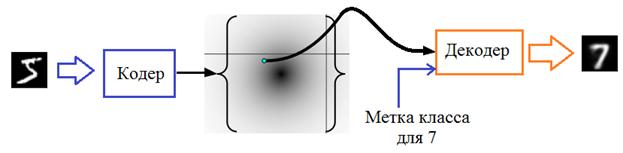

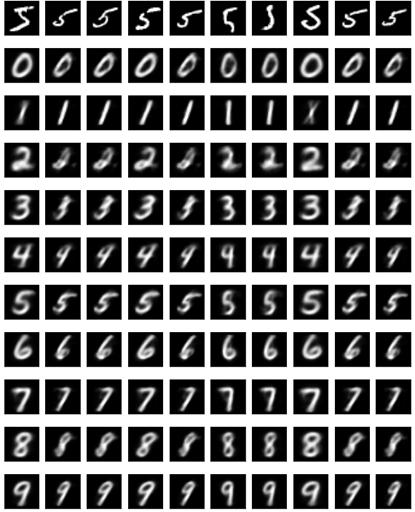

К нашей радости, получили хорошо идентифицируемые цифры, да еще и в нужном стиле!

**Содержание темы**

1. Теория

2. [Практика](https://colab.research.google.com/drive/1HEHdfduypm3KDWv2a-GGjfTL-7d6oPVN?usp=sharing)



